In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [ ]:
datos = pd.read_csv("data/load_wine.csv")

In [ ]:
X = datos.drop("class_wine", axis=1)
y = datos["class_wine"]

In [ ]:
modelo_pca_sin_escalar = PCA()
componentes_sin_escalar = modelo_pca_sin_escalar.fit_transform(X)

# Varianza explicada sin escalar
varianza_sin = modelo_pca_sin_escalar.explained_variance_ratio_

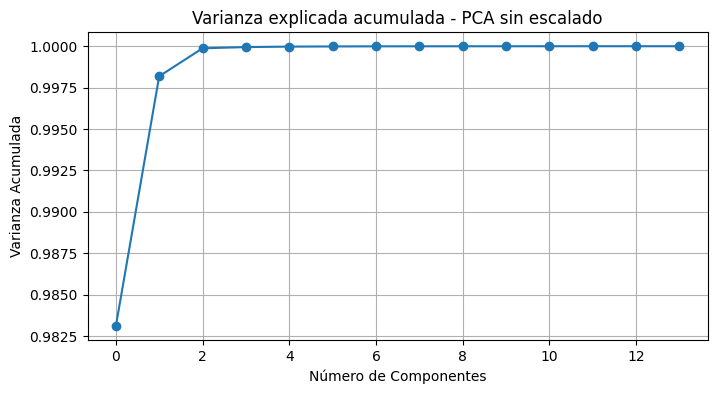

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(np.cumsum(varianza_sin), marker='o')
plt.title("Varianza explicada acumulada - PCA sin escalado")
plt.xlabel("Número de Componentes")
plt.ylabel("Varianza Acumulada")
plt.grid()
plt.show()

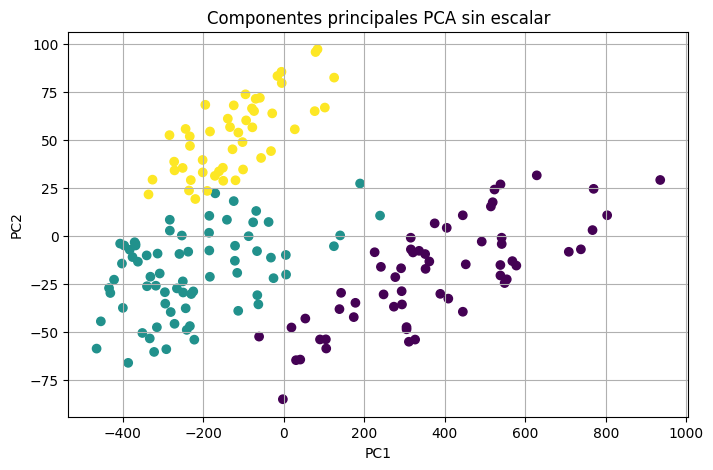

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(componentes_sin_escalar[:,0], componentes_sin_escalar[:,1], c=y, cmap="viridis")
plt.title("Componentes principales PCA sin escalar")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid()
plt.show()

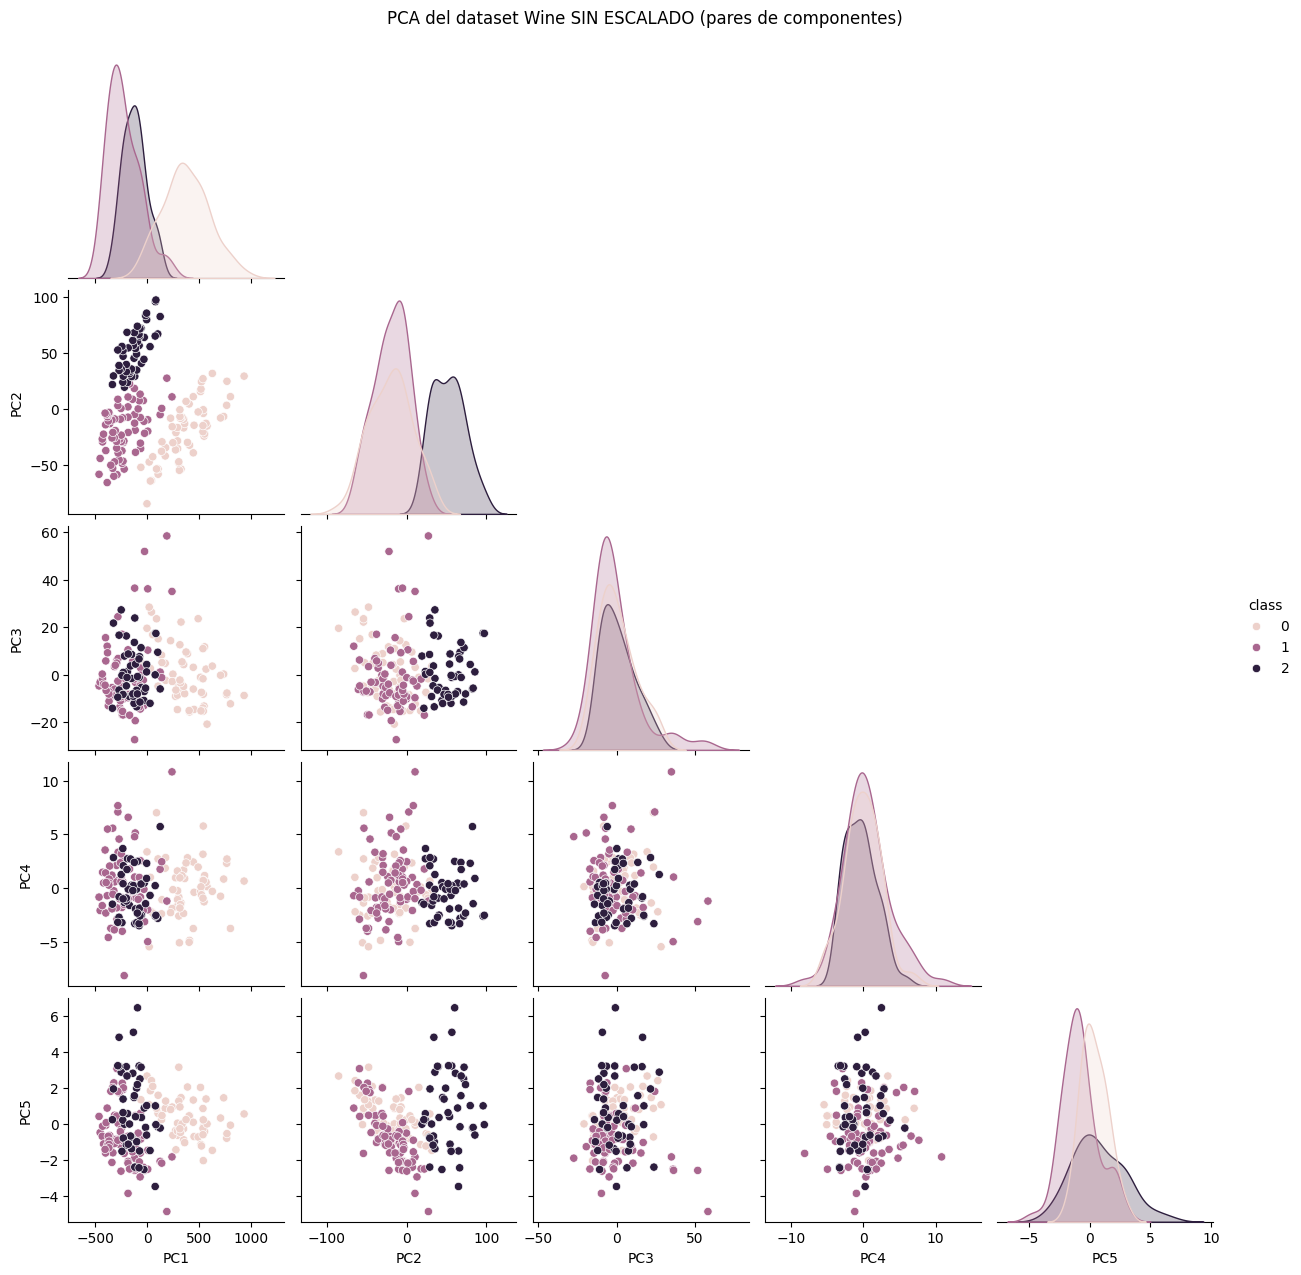

In [ ]:
pca_no_scale = PCA(n_components=5)
pcs_no_scale = pca_no_scale.fit_transform(X)

df_pca_no_scale = pd.DataFrame(
    pcs_no_scale,
    columns=["PC1", "PC2", "PC3", "PC4", "PC5"]
)
df_pca_no_scale["class"] = y

sns.pairplot(
    df_pca_no_scale,
    hue="class",
    diag_kind="kde",
    corner=True
)
plt.suptitle("PCA del dataset Wine SIN ESCALADO (pares de componentes)", y=1.02)
plt.show()

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

modelo_pca_escalado = PCA()
componentes_escalados = modelo_pca_escalado.fit_transform(X_scaled)

# Varianza explicada escalado
varianza_con = modelo_pca_escalado.explained_variance_ratio_

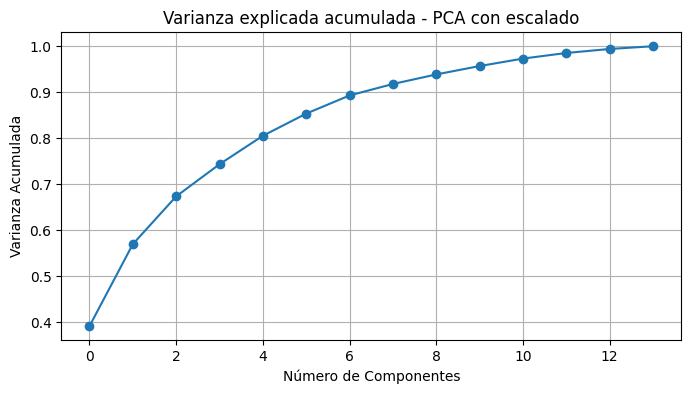

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(np.cumsum(varianza_con), marker='o')
plt.title("Varianza explicada acumulada - PCA con escalado")
plt.xlabel("Número de Componentes")
plt.ylabel("Varianza Acumulada")
plt.grid()
plt.show()

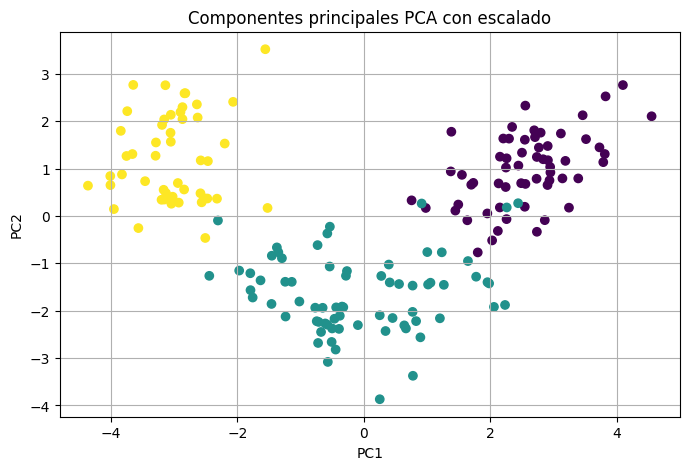

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(componentes_escalados[:,0], componentes_escalados[:,1], c=y, cmap="viridis")
plt.title("Componentes principales PCA con escalado")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid()
plt.show()

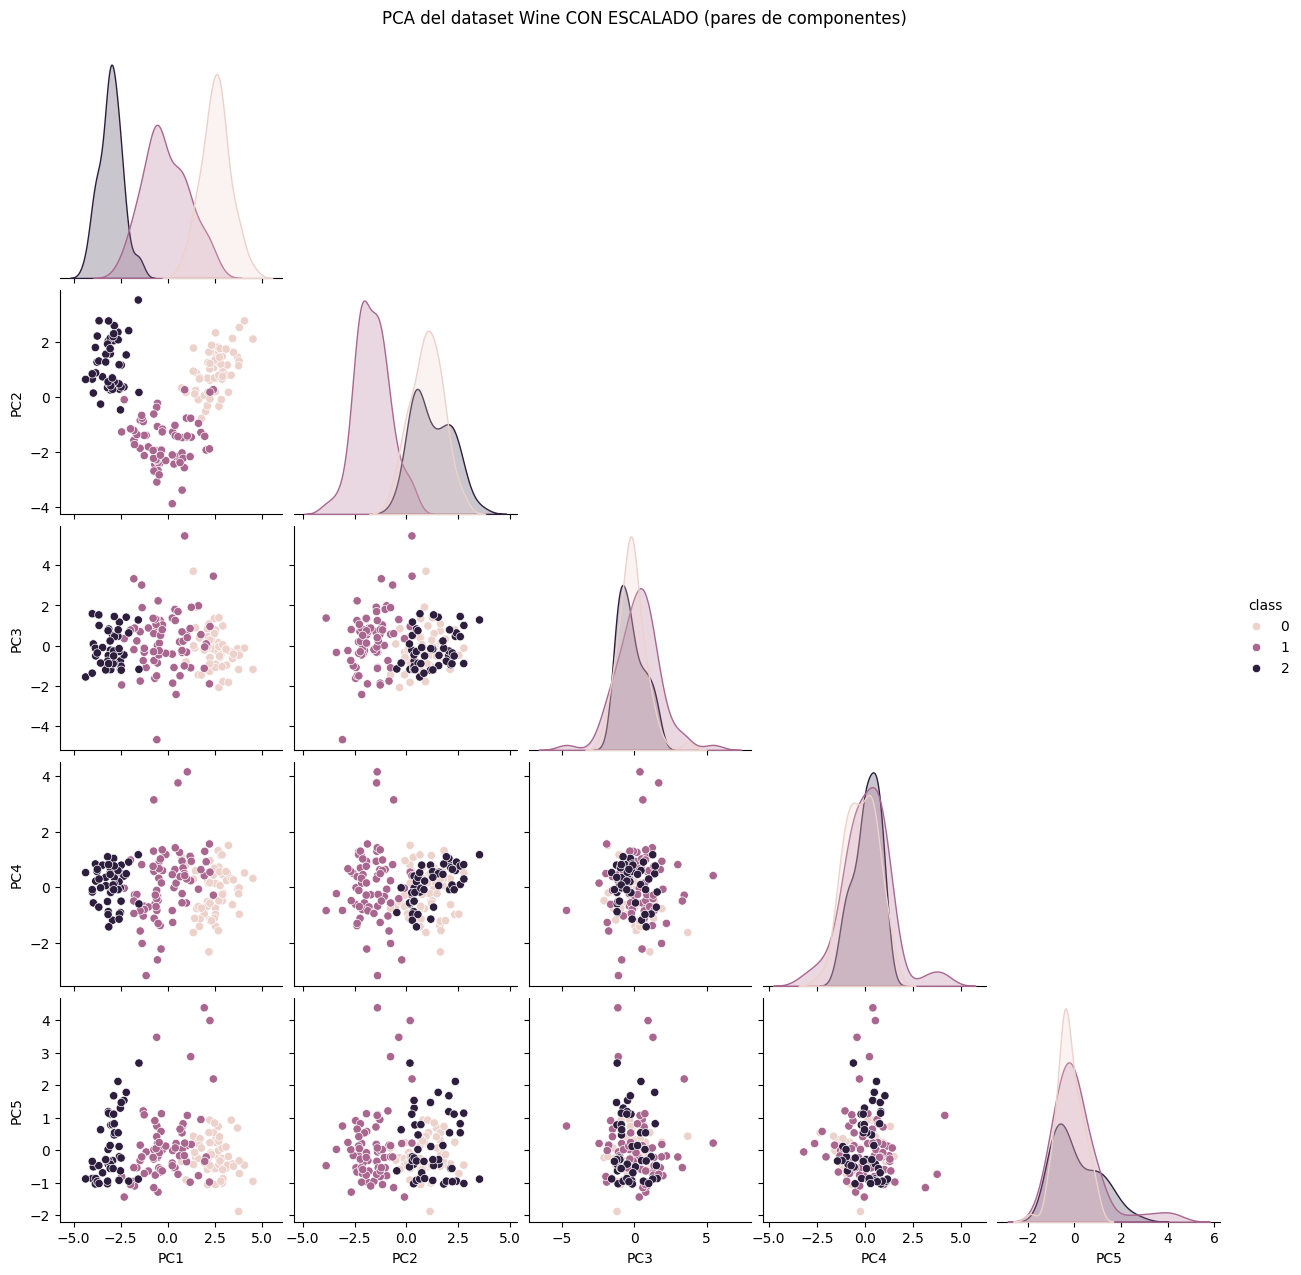

In [ ]:
pca_scaled = PCA(n_components=5)
pcs_scaled = pca_scaled.fit_transform(X_scaled)

df_pca_scaled = pd.DataFrame(
    pcs_scaled,
    columns=["PC1", "PC2", "PC3", "PC4", "PC5"]
)
df_pca_scaled["class"] = y

sns.pairplot(
    df_pca_scaled,
    hue="class",
    diag_kind="kde",
    corner=True
)
plt.suptitle("PCA del dataset Wine CON ESCALADO (pares de componentes)", y=1.02)
plt.show()

In [ ]:
pipe = Pipeline([
    ("pca", PCA()),
    ("clf", LogisticRegression(max_iter=5000))
])

parametros = {
    "pca__n_components": list(range(2, X.shape[1] + 1))
}

grid_pca = GridSearchCV(
    estimator=pipe,
    param_grid=parametros,
    cv=5
)

grid_pca.fit(X_scaled, y)

,estimator,Pipeline(step..._iter=5000))])
,param_grid,"{'pca__n_components': [2, 3, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_components,5


In [ ]:
n_componentes_optimo = grid_pca.best_params_["pca__n_components"]

print("Hiperparámetros óptimos:", grid_pca.best_params_)
print("Número óptimo de componentes PCA:", n_componentes_optimo)

# Transformación con el PCA óptimo
modelo_pca_optimizado = PCA(n_components=n_componentes_optimo)
componentes_opt = modelo_pca_optimizado.fit_transform(X_scaled)

Hiperparámetros óptimos: {'pca__n_components': 5}
Número óptimo de componentes PCA: 5


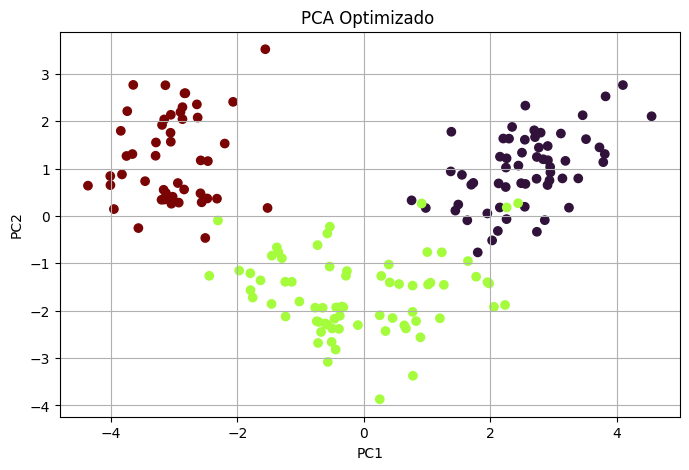

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(componentes_opt[:,0], componentes_opt[:,1], c=y, cmap="turbo")
plt.title(f"PCA Optimizado ")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid()
plt.show()